# MOVIE PREDICTION

#### Part 1 : Data and Library Imports

##### Importing Packages

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

##### Loading in Data

In [94]:
prime_df = pd.read_csv('prime_titles.csv')
hulu_df=pd.read_csv('hulu_titles.csv')

##### Creating a new column to indicate which streaming platform the data is from 

In [95]:
prime_df = (prime_df.assign(service="amazon"))
hulu_df = (hulu_df.assign(service="hulu"))

##### Combining both dataframes into one massive one

In [96]:
df=pd.concat([prime_df,hulu_df],axis=0)

### Part 2 : Data Exploration

In [60]:
print(df.head())
print(df.columns)

        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres production_countries  \
0  comed

In [27]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,12269.000000,12269.000000,2687.000000,11082.000000,1.107100e+04,11672.000000,10027.000000
mean,2003.690195,81.193414,3.358020,6.121964,1.251424e+04,11.126693,6.185439
std,23.937322,35.190327,4.635468,1.349110,5.452253e+04,49.917316,1.503501
min,1912.000000,0.000000,1.000000,1.000000,5.000000e+00,0.000011,0.800000
25%,2001.000000,57.000000,1.000000,5.300000,1.440000e+02,1.400000,5.300000
50%,2014.000000,87.000000,2.000000,6.200000,6.390000e+02,3.244000,6.200000
75%,2019.000000,100.000000,4.000000,7.100000,3.740000e+03,8.256000,7.100000
max,2022.000000,549.000000,63.000000,9.900000,1.133692e+06,2989.846000,10.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12269 entries, 0 to 2397
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    12269 non-null  object 
 1   title                 12269 non-null  object 
 2   type                  12269 non-null  object 
 3   description           12137 non-null  object 
 4   release_year          12269 non-null  int64  
 5   age_certification     5097 non-null   object 
 6   runtime               12269 non-null  int64  
 7   genres                12269 non-null  object 
 8   production_countries  12269 non-null  object 
 9   seasons               2687 non-null   float64
 10  imdb_id               11467 non-null  object 
 11  imdb_score            11082 non-null  float64
 12  imdb_votes            11071 non-null  float64
 13  tmdb_popularity       11672 non-null  float64
 14  tmdb_score            10027 non-null  float64
dtypes: float64(5), int64

##### Dealing with missing values

In [30]:
df.isna()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2394,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True
2395,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
2396,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False


In [31]:
df.isna().sum()

id                         0
title                      0
type                       0
description              132
release_year               0
age_certification       7172
runtime                    0
genres                     0
production_countries       0
seasons                 9582
imdb_id                  802
imdb_score              1187
imdb_votes              1198
tmdb_popularity          597
tmdb_score              2242
dtype: int64

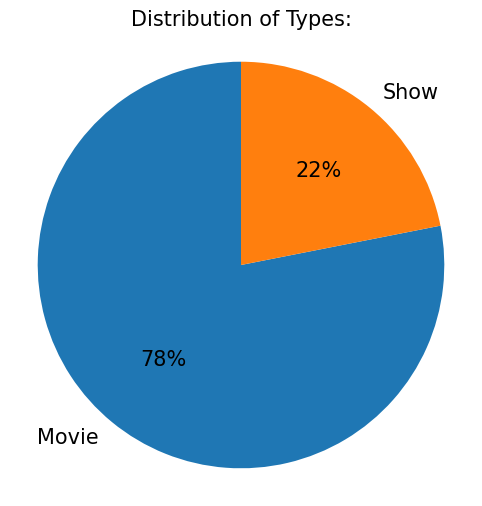

In [43]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Types:', fontsize=15)
plt.pie(df.type.value_counts(), 
        labels=['Movie', 'Show'],
        textprops={"fontsize":15},
        radius=1.1, startangle=90,
        autopct='%.0f%%')
plt.show()

In [48]:
descriptions = (pd.DataFrame(df.description.dropna())).reset_index()
mas = []
for i in range(5832):
  w = descriptions.description[i]
  ww = w.split()
  mas.append(ww)

data = []
for i in mas:
    for j in range(len(i)):
        data.append(i[j].lower())
        
big_string=''
for i in range(len(data)):
    big_string+=(data[i]+' ')

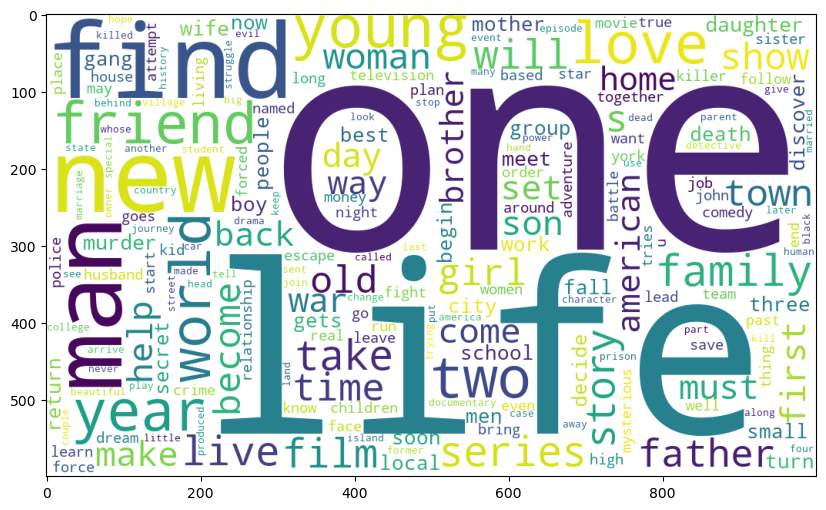

In [ ]:
wordCloud = WordCloud(width = 1000, height = 600, random_state=1,background_color='white', collocations=False).generate(big_string)

plt.figure(figsize=(10,6))
plt.imshow(wordCloud)

In [67]:
print('NaN values in age sertification variable:', df.age_certification.isna().sum())
print('This is', round(df.age_certification.isna().sum()/df.age_certification.shape[0]*100),'% of all the values')

NaN values in age sertification variable: 7172
This is 58 % of all the values


#### Part 3 : Data Cleaning

##### Genre and production country columns are lists- need to get a top category

#####  1. genre 

In [97]:
df['genres'] = df['genres'].str.strip("[]'")

In [98]:
genres_df = df['genres'].str.split(', ', expand=True)

In [99]:
genres_df.columns = [f'genre_{i}' for i in range(genres_df.shape[1])]

In [100]:
df = pd.concat([df, genres_df], axis=1)

In [104]:
df['genre_0'] = df['genre_0'].str.strip("'")
df['genre_1'] = df['genre_1'].str.strip("'")
df['genre_2'] = df['genre_2'].str.strip("'")
df['genre_3'] = df['genre_3'].str.strip("'")
df['genre_4'] = df['genre_4'].str.strip("'")
df['genre_5'] = df['genre_5'].str.strip("'")
df['genre_6'] = df['genre_6'].str.strip("'")
df['genre_7'] = df['genre_7'].str.strip("'")
df['genre_8'] = df['genre_8'].str.strip("'")

In [102]:
df.drop(['genres'], axis=1, inplace=True)

In [105]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,imdb_id,...,service,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,['US'],26.0,tt0850645,...,amazon,comedy,family,animation,action,fantasy,horror,None,None,None
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,['US'],NaN,tt0017925,...,amazon,action,drama,war,western,comedy,european,None,None,None
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,['US'],NaN,tt0036868,...,amazon,romance,war,drama,None,None,None,None,None,None
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,['US'],NaN,tt0032599,...,amazon,comedy,drama,romance,None,None,None,None,None,None
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,['US'],NaN,tt0042593,...,amazon,thriller,drama,romance,None,None,None,None,None,None


In [106]:
df['genre_0'].unique()

array(['comedy', 'action', 'romance', 'thriller', 'western', 'drama',
       'crime', 'history', 'horror', 'scifi', 'fantasy', 'documentation',
       'war', '', 'music', 'reality', 'family', 'sport', 'animation',
       'european'], dtype=object)

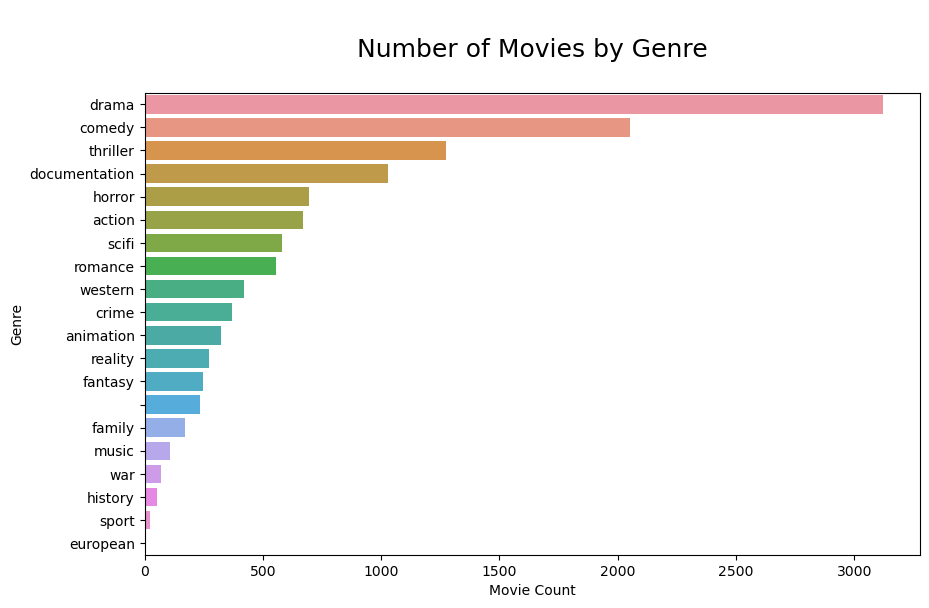

In [118]:
bp_df = pd.DataFrame(df.genre_0.value_counts())
order = bp_df.index
plt.figure(figsize=(10,6))
plt.title('\nNumber of Movies by Genre\n', fontsize=18)
sns.countplot(y=df.genre_0, order=order)
plt.xlabel('Movie Count')
plt.ylabel('Genre')
plt.show()

#####  2. Seasons  

In [112]:
df.loc[df['type'] == 'MOVIE', ['seasons']] = 0

#####  3. Production Countries 

In [114]:
df['production_countries'] = df['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
df['lead_prod_country'] = df['production_countries'].str.split(',').str[0]

# Let's also add a number of countries, envolved in movie making, so that we save a little more data
df['prod_countries_cnt'] = df['production_countries'].str.split(',').str.len()
df.lead_prod_country = df.lead_prod_country.replace('', np.nan)

/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T/ipykernel_4163/2226315985.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['production_countries'] = df['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')


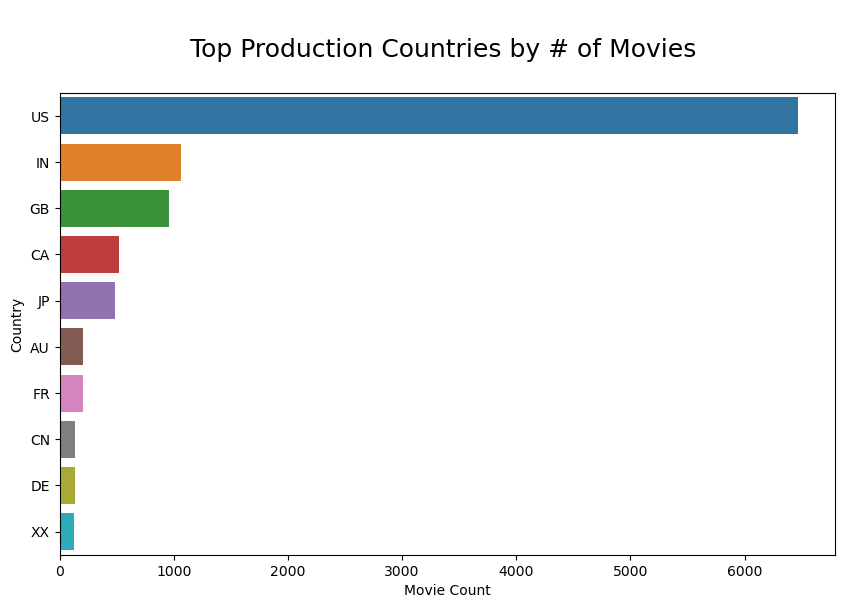

In [117]:
bp_df = pd.DataFrame(df.lead_prod_country.value_counts()).head(10)
order = bp_df.index
plt.figure(figsize=(10,6))
plt.title('\nTop Production Countries by # of Movies \n', fontsize=18)
sns.countplot(y=df.lead_prod_country, order=order)
plt.xlabel('Movie Count')
plt.ylabel('Country')
plt.show()

##### Explanatory Data Analysis

In [33]:
# Rating Distrubution 

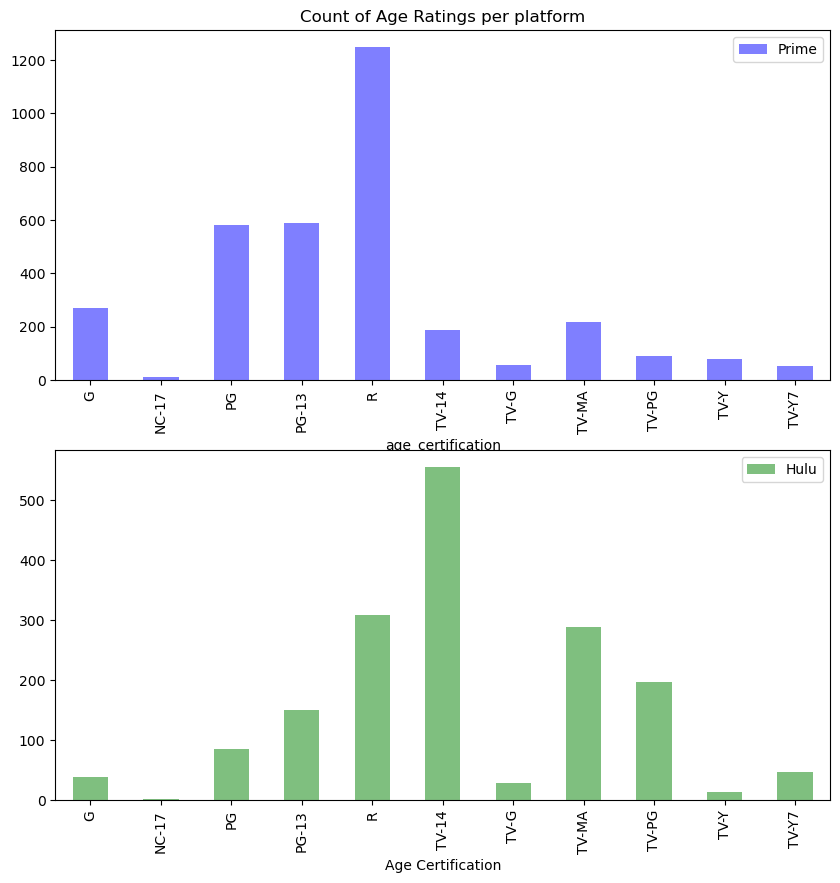

In [15]:
fig, ax = plt.subplots(2,figsize=(10, 10))

# Plot the first line
prime_df.groupby(['age_certification']).size().plot.bar(ax=ax[0], color='blue', alpha=0.5, label='Prime')


# Plot the third line
hulu_df.groupby(['age_certification']).size().plot.bar(ax=ax[1], color='green', alpha=0.5, label='Hulu')

# Set the title and labels
ax[0].set_title('Count of Age Ratings per platform')
ax[1].set_xlabel('Age Certification')


# Set the legend
ax[0].legend()
ax[1].legend()
ax[1].legend()

# Show the plot
plt.show()

In [ ]:
df.to_csv('data.csv', index=False)